In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#making the path to the csv and reading it in
filepath = "cleaned_data/clean_battle_info.csv"

battle_info = pd.read_csv(filepath)
print(battle_info.shape)
battle_info.head()

(2351, 8)


,Character,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Universe
0,Wonder Woman,7,8,3,Telekinesis,Kryptonite,0,DC Comics
1,Iron Man,4,7,9,Telekinesis,Kryptonite,0,Marvel
2,Iron Man,8,7,5,Telekinesis,Magic,0,Marvel
3,Spider-Man,5,6,10,Telekinesis,Kryptonite,0,Marvel
4,Flash,7,6,2,Invisibility,Magic,0,DC Comics


In [3]:
battle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Strength          2351 non-null   int64 
 2   Speed             2351 non-null   int64 
 3   Intelligence      2351 non-null   int64 
 4   SpecialAbilities  2351 non-null   object
 5   Weaknesses        2351 non-null   object
 6   BattleOutcome     2351 non-null   int64 
 7   Universe          2351 non-null   object
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


In [4]:
battle_info['SpecialAbilities'].unique()

array(['Telekinesis', 'Invisibility', 'Super Strength', 'Flight'],
      dtype=object)

In [5]:
battle_info['Weaknesses'].unique()

array(['Kryptonite', 'Magic', 'Wooden Stake', 'Silver'], dtype=object)

In [6]:
#making a copy of the DF just to be safe
battle_info2 = battle_info.copy()

In [7]:
# #making list of character names to make it eaiser
# marvel_characters = ['Iron Man','Spider-Man','Thor','Captain America']

In [8]:
# feature engineering

# 1. one hot encoding the special abilities column to make the strings numbers
battle_encoded = pd.get_dummies(battle_info2, columns=['SpecialAbilities'])


# 2. also one hot encoding the weakness column
battle_encoded2 = pd.get_dummies(battle_encoded, columns=['Weaknesses'])
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,Universe,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
0,Wonder Woman,7,8,3,0,DC Comics,False,False,False,True,True,False,False,False
1,Iron Man,4,7,9,0,Marvel,False,False,False,True,True,False,False,False
2,Iron Man,8,7,5,0,Marvel,False,False,False,True,False,True,False,False
3,Spider-Man,5,6,10,0,Marvel,False,False,False,True,True,False,False,False
4,Flash,7,6,2,0,DC Comics,False,True,False,False,False,True,False,False


In [9]:
# label encoding the universe to make it easier for the models later just in case
le = LabelEncoder()
battle_encoded2['Universe_encoded'] = le.fit_transform(battle_encoded2['Universe'])
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,Universe,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
0,Wonder Woman,7,8,3,0,DC Comics,False,False,False,True,True,False,False,False,0
1,Iron Man,4,7,9,0,Marvel,False,False,False,True,True,False,False,False,1
2,Iron Man,8,7,5,0,Marvel,False,False,False,True,False,True,False,False,1
3,Spider-Man,5,6,10,0,Marvel,False,False,False,True,True,False,False,False,1
4,Flash,7,6,2,0,DC Comics,False,True,False,False,False,True,False,False,0


In [10]:
#dropping the universe column after its been encoded
battle_encoded2.drop(columns= 'Universe', inplace=True)

In [11]:
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
0,Wonder Woman,7,8,3,0,False,False,False,True,True,False,False,False,0
1,Iron Man,4,7,9,0,False,False,False,True,True,False,False,False,1
2,Iron Man,8,7,5,0,False,False,False,True,False,True,False,False,1
3,Spider-Man,5,6,10,0,False,False,False,True,True,False,False,False,1
4,Flash,7,6,2,0,False,True,False,False,False,True,False,False,0


In [12]:
battle_encoded2.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'BattleOutcome',
       'SpecialAbilities_Flight', 'SpecialAbilities_Invisibility',
       'SpecialAbilities_Super Strength', 'SpecialAbilities_Telekinesis',
       'Weaknesses_Kryptonite', 'Weaknesses_Magic', 'Weaknesses_Silver',
       'Weaknesses_Wooden Stake', 'Universe_encoded'],
      dtype='object')

#### pipeline encoding with the original dataset 
this is really to see how the data compares to what i just encoded 

In [13]:
# making a third copy because im scared to lose the og dataframe
battle_pipeline = battle_info.copy()

In [14]:
battle_pipeline.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'SpecialAbilities',
       'Weaknesses', 'BattleOutcome', 'Universe'],
      dtype='object')

In [15]:
# trying the preporcessing pipeline from titanic v3 with the original data set

# Define preprocessing for numeric features 
#i dont know if this is the best thing to do but we will see
numeric_features = ['Strength', 'Speed', 'Intelligence'] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['BattleOutcome', 'SpecialAbilities', 'Weaknesses', 'Universe']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['Character']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [16]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(battle_pipeline)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

battle_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
# battle_final["BattleOutcome"] = df.Survived
battle_final.head(15)

,Strength,Speed,Intelligence,BattleOutcome,SpecialAbilities,Weaknesses,Universe,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman
0,0.537620,0.879933,-0.890985,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.498117,0.530073,1.204769,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.882866,0.530073,-0.192401,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.152871,0.180213,1.554061,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.537620,0.180213,-1.240278,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.573357,1.229792,0.506184,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-0.843363,0.180213,-1.240278,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.537620,-1.219227,-0.541693,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.882866,-1.219227,0.506184,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.152871,-0.169647,-0.541693,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
# okay cool the pipeline looked like it work but i dont know what it means?
# i think this is what its supposed to look like 
# i really dont know 

In [18]:
corrs = battle_final.corr()
corrs

,Strength,Speed,Intelligence,BattleOutcome,SpecialAbilities,Weaknesses,Universe,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman
Strength,1.000000,-0.041399,0.011212,0.299753,-0.002435,-0.015819,-0.009846,0.022005,-0.028083,0.012566,0.000705,-0.015051,-0.004331,0.026272,-0.014438
Speed,-0.041399,1.000000,-0.001245,0.176810,-0.033530,0.008725,0.024570,-0.002893,0.009085,0.007175,0.015283,-0.016500,-0.024231,0.028592,-0.016414
Intelligence,0.011212,-0.001245,1.000000,0.246996,0.002756,-0.029280,0.027617,-0.019608,0.034756,0.025013,0.013362,-0.012483,-0.020770,0.006378,-0.025802
BattleOutcome,0.299753,0.176810,0.246996,1.000000,0.024907,0.198159,0.024216,0.012171,0.007967,0.006443,0.017029,0.013009,-0.018751,-0.001224,-0.035035
SpecialAbilities,-0.002435,-0.033530,0.002756,0.024907,1.000000,0.032002,0.007239,0.006066,0.029726,-0.023794,-0.031438,0.004277,-0.025271,0.009790,0.031900
Weaknesses,-0.015819,0.008725,-0.029280,0.198159,0.032002,1.000000,-0.001971,0.006367,0.005162,-0.012545,-0.005712,-0.001178,0.002567,-0.001027,0.006517
Universe,-0.009846,0.024570,0.027617,0.024216,0.007239,-0.001971,1.000000,-0.362760,0.369678,-0.373012,0.392762,0.370434,-0.383125,0.386131,-0.385276
Character_Batman,0.022005,-0.002893,-0.019608,0.012171,0.006066,0.006367,-0.362760,1.000000,-0.134104,-0.138458,-0.142478,-0.134379,-0.142212,-0.140073,-0.143010
Character_Captain America,-0.028083,0.009085,0.034756,0.007967,0.029726,0.005162,0.369678,-0.134104,1.000000,-0.137894,-0.141898,-0.133831,-0.141633,-0.139503,-0.142428
Character_Flash,0.012566,0.007175,0.025013,0.006443,-0.023794,-0.012545,-0.373012,-0.138458,-0.137894,1.000000,-0.146505,-0.138176,-0.146231,-0.144032,-0.147052


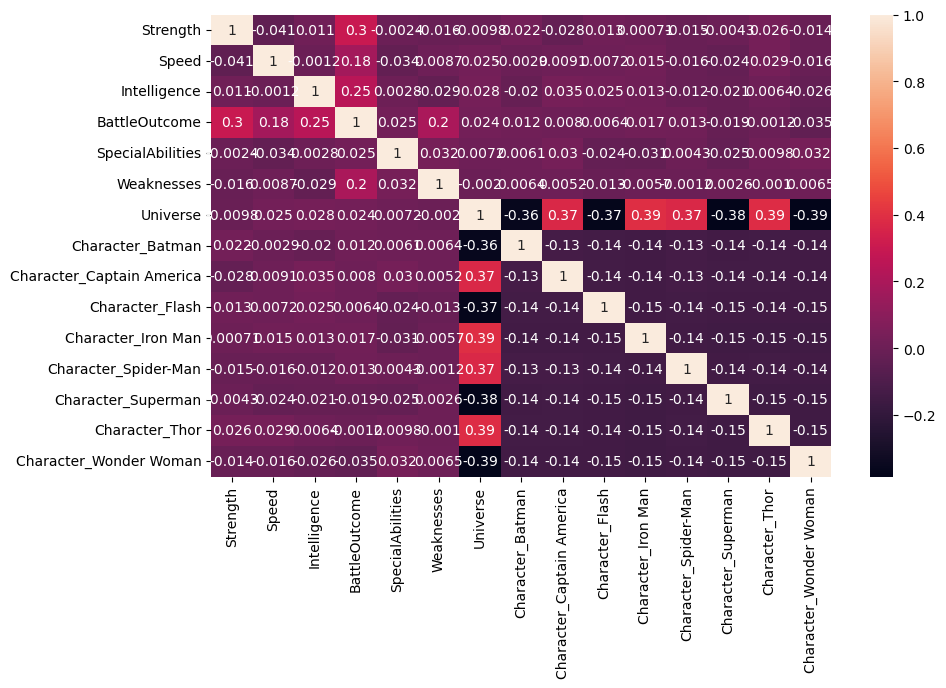

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.show()

In [20]:
battle_final.BattleOutcome.value_counts()

BattleOutcome
0.0    1695
1.0     656
Name: count, dtype: int64

In [25]:
battle_encoded2.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'BattleOutcome',
       'SpecialAbilities_Flight', 'SpecialAbilities_Invisibility',
       'SpecialAbilities_Super Strength', 'SpecialAbilities_Telekinesis',
       'Weaknesses_Kryptonite', 'Weaknesses_Magic', 'Weaknesses_Silver',
       'Weaknesses_Wooden Stake', 'Universe_encoded'],
      dtype='object')

In [38]:
print([f"'{col}'" for col in battle_encoded2.columns])

["'Character'", "'Strength'", "'Speed'", "'Intelligence'", "'BattleOutcome'", "'SpecialAbilities_Flight'", "'SpecialAbilities_Invisibility'", "'SpecialAbilities_Super Strength'", "'SpecialAbilities_Telekinesis'", "'Weaknesses_Kryptonite'", "'Weaknesses_Magic'", "'Weaknesses_Silver'", "'Weaknesses_Wooden Stake'", "'Universe_encoded'"]


In [40]:
print(battle_encoded2.columns[battle_encoded2.columns.duplicated()])

Index([], dtype='object')


In [21]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = battle_encoded2.drop(columns=["BattleOutcome", "Character"])
y = battle_encoded2.BattleOutcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(1763, 12) (588, 12)


In [22]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED

,Strength,Speed,Intelligence,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
1723,2,9,2,False,False,False,True,False,False,False,True,0
813,4,3,6,False,True,False,False,False,True,False,False,1
1575,1,10,3,False,False,True,False,False,False,True,False,1
764,10,10,5,False,False,True,False,False,False,True,False,1
2235,9,3,7,False,True,False,False,True,False,False,False,0


In [26]:
y_train.head()

1723    0
813     0
1575    0
764     1
2235    0
Name: BattleOutcome, dtype: int64

In [23]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[1156  115]
 [ 219  273]]
    
    AUC: 0.8671025951014819

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.91      0.87      1271
           1       0.70      0.55      0.62       492

    accuracy                           0.81      1763
   macro avg       0.77      0.73      0.75      1763
weighted avg       0.80      0.81      0.80      1763

    
TEST METRICS
    Confusion Matrix: 
    [[380  44]
 [ 72  92]]
    
    AUC: 0.84826564657156

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.90      0.87       424
           1       0.68      0.56      0.61       164

    accuracy                           0.80       588
   macro avg       0.76      0.73      0.74       588
weighted avg       0.79      0.80      0.80       588

    


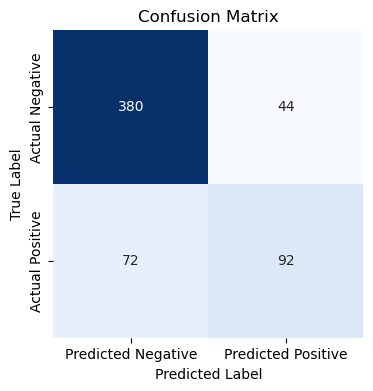

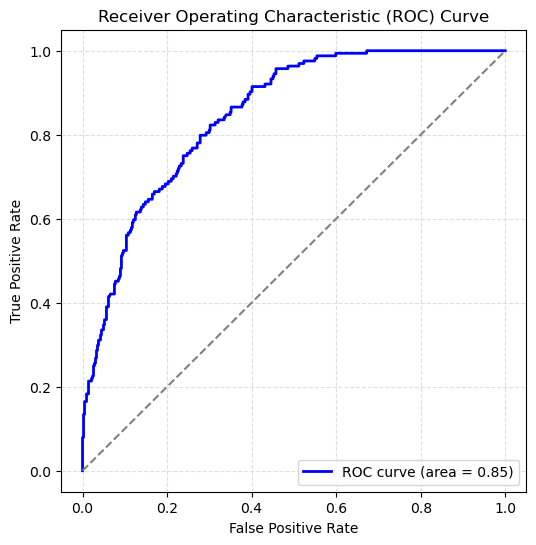

In [41]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

In [30]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

y_train.head()
# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [31]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [32]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [33]:
# Step 2: Init the Model
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test) 

ValueError: A given column is not a column of the dataframe

In [34]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [35]:
 # Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [36]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [37]:
 # Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

ValueError: A given column is not a column of the dataframe

In [ ]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [ ]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
 fi = pd.DataFrame(list(zip(X.columns, xgb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.named_steps['classifier'].feature_importances_ / sum(lgbm.named_steps['classifier'].feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
 fi = pd.DataFrame(list(zip(X.columns, ada.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)